In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
dbc = pd.read_csv('#add your path here#')

In [3]:
dbc.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dbc.info()
dbc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#Based on research on breast cancer, we are going to focus on the following columns: age, bmi, smoker
#and drop the rest of the columns
dbc_new = dbc[['age', 'bmi', 'smoker']]

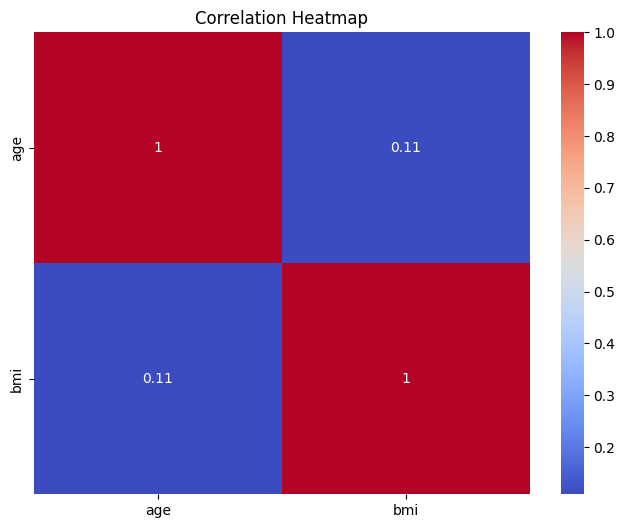

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(dbc_new.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

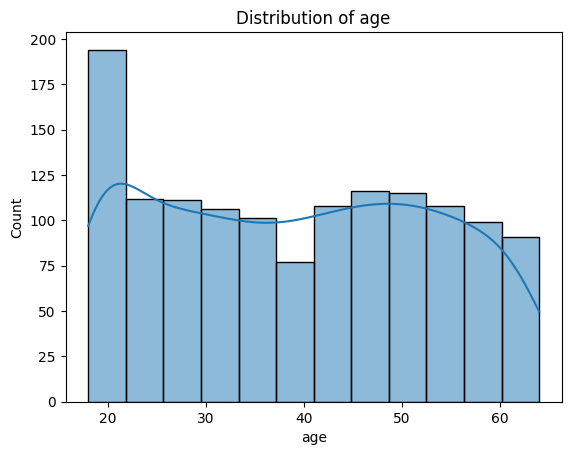

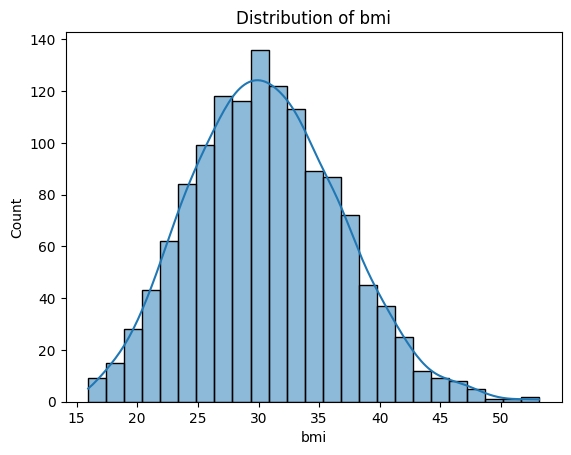

In [7]:
columns = ['age', 'bmi']
for col in columns:
    sns.histplot(dbc_new[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

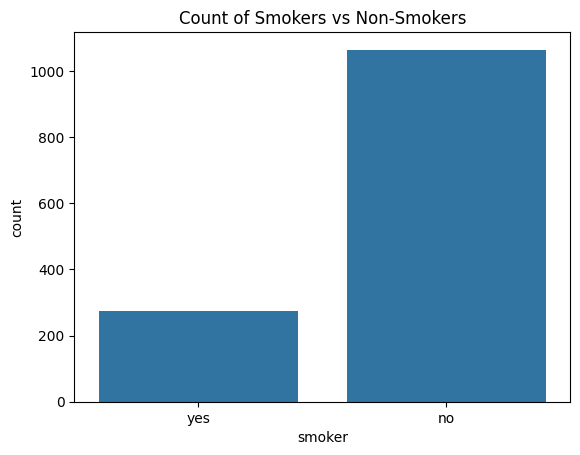

In [8]:
sns.countplot(x='smoker', data=dbc_new)
plt.title('Count of Smokers vs Non-Smokers')
plt.show()

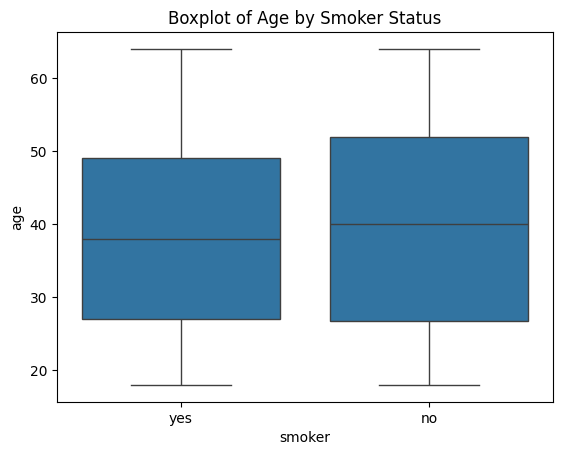

In [9]:
sns.boxplot(x='smoker', y='age', data=dbc_new)
plt.title('Boxplot of Age by Smoker Status')
plt.show()

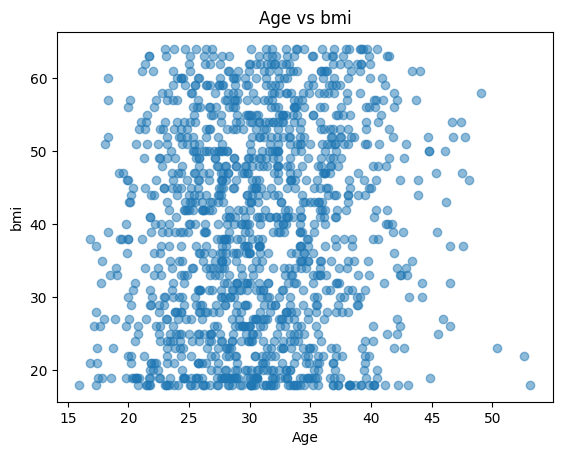

In [10]:
plt.scatter(dbc_new['bmi'], dbc_new['age'], alpha=0.5)
plt.title('Age vs bmi')
plt.xlabel('Age')
plt.ylabel('bmi')
plt.show()

In [11]:
LabelEncoder = LabelEncoder()
dbc_new['smoker'] = LabelEncoder.fit_transform(dbc_new['smoker'])

In [12]:
scaler = StandardScaler()

# Fit the scaler on the numerical columns
dbc_new[['age', 'bmi']] = scaler.fit_transform(dbc_new[['age', 'bmi']])

In [ ]:
#save dataset to csv file
dbc_new.to_csv  #add your path here, index=False)

In [ ]:
dbc_new.head(5)

,age,bmi,smoker
0,-1.438764,-0.453320,1
1,-1.509965,0.509621,0
2,-0.797954,0.383307,0
3,-0.441948,-1.305531,0
4,-0.513149,-0.292556,0


In [15]:
X = dbc_new.iloc[:, :-1].values
y = dbc_new.iloc[:, -1].values


**KMeans**

Text(0, 0.5, 'SSE')

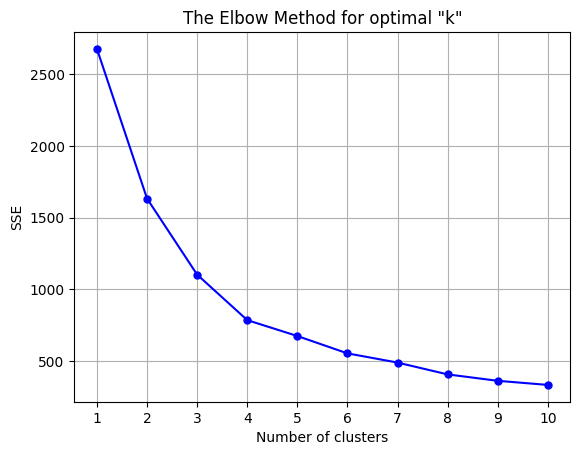

In [16]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(X)
    inertia.append(model.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o', markersize=5, color='blue')
plt.xticks(range(1, 11))
plt.title('The Elbow Method for optimal "k"')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Model Inertia

In [17]:
#from the elbow curve, we can see that the optimal number of clusters is 3
model = KMeans(n_clusters=3, random_state=0)
y = model.fit_predict(X)
dbc_new['cluster'] = y

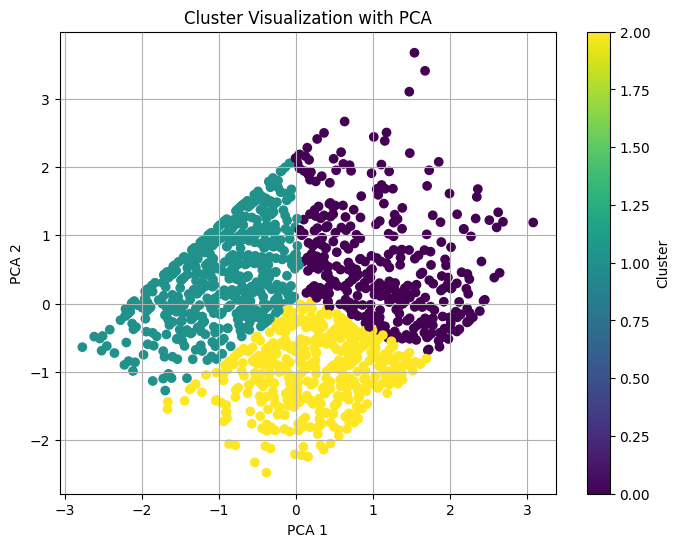

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Cluster Visualization with PCA')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [19]:
print("\nCluster Summary (means):")
print(dbc_new.groupby('cluster').mean(numeric_only=True))
print("\nCluster Summary (count):")
print(dbc_new.groupby('cluster').size())


Cluster Summary (means):
              age       bmi    smoker
cluster                              
0        0.370721  1.187021  0.216438
1       -0.964134 -0.382872  0.200000
2        0.848032 -0.519956  0.200903

Cluster Summary (count):
cluster
0    365
1    530
2    443
dtype: int64


| Cluster | Age   | BMI   | Smoker | Interpretation                                                          
| ------- | ----- | ----- | ------ | -------------------------------------------------------
| 0       | -0.05 | -1.00 | 0.20   | Younger, low BMI, with slightly more smokers.                
| 1       | 0.95  | 0.63  | 0.19   | Older, higher BMI, group with slightly fewer smokers.               
| 2       | -0.98 | 0.43  | 0.23   | Youngest group, moderate BMI, highest smoking tendency


**MeanShift**

In [20]:
from sklearn.cluster import MeanShift
mean_shift = MeanShift(bandwidth = 0.5)
mean_shift.fit(X)
mean_shift_clusters = mean_shift.predict(X)
mean_shift_clusters_centers = mean_shift.cluster_centers_
print(mean_shift_clusters_centers)


[[-1.24403979 -0.13213458]
 [ 0.37994961 -0.44447839]
 [-0.46491572 -0.25026865]
 [ 0.80699131  0.16122155]
 [ 0.9813642  -0.59671128]
 [-0.84493165 -0.8220903 ]
 [-0.41121866  0.39590374]
 [ 0.99571048  0.78566084]
 [ 0.23294879  0.57749886]
 [ 1.49955629  1.09168606]
 [-0.20291503  1.63563998]
 [ 0.71062167  2.44796042]
 [-0.00456886  2.36695614]
 [-1.29636188  3.5050733 ]]


In [21]:
#Assigning the cluster labels to the original dataframe
dbc_new['mean_shift_cluster'] = mean_shift_clusters

In [22]:
cluster_meanshift_summary = dbc_new.groupby('mean_shift_cluster').mean(numeric_only=True)
print("\nMean Shift Cluster Summary (means):")
print(cluster_meanshift_summary)




Mean Shift Cluster Summary (means):
                         age       bmi    smoker   cluster
mean_shift_cluster                                        
0                  -1.300454  0.068780  0.241379  1.000000
1                   0.297574 -0.647682  0.257576  1.992424
2                  -0.384141 -0.304454  0.178218  1.019802
3                   1.017677  0.145146  0.138889  1.870370
4                   1.154874 -0.873188  0.187135  2.000000
5                  -0.938895 -1.259195  0.184615  1.051282
6                  -0.667655  0.599460  0.280000  0.640000
7                   0.958668  0.831744  0.191781  0.246575
8                   0.222597  0.615051  0.153846  0.153846
9                   1.514733  1.096412  0.189873  0.329114
10                 -0.630970  1.503174  0.190476  0.083333
11                  0.892415  2.218357  0.222222  0.000000
12                 -0.376680  2.432906  0.333333  0.000000
13                 -1.331962  3.211844  0.500000  0.000000


In [23]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, mean_shift_clusters)
print(f"Silhouette Score: {score:.2f}")  

Silhouette Score: 0.27


0.27 depicts weak clustering, so optimization is necessay

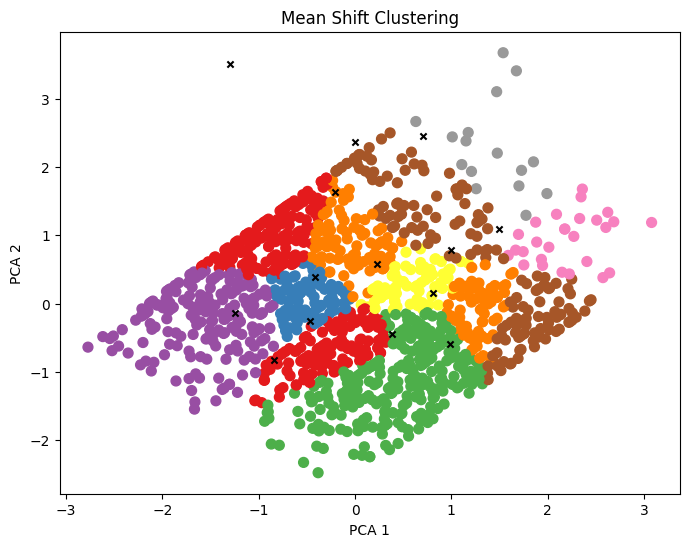

In [24]:
#visaulizing the clusters
plt.figure(figsize=(8, 6))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mean_shift_clusters, cmap='Set1', s=50)
plt.scatter(mean_shift_clusters_centers[:, 0], mean_shift_clusters_centers[:, 1], 
            c='black', marker='x', s=20, label='Centers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Mean Shift Clustering")
plt.show()

In [25]:
#optimizing the bandwidth parameter and compare silhouette scores
bandwidths = np.arange(0.1, 1.0, 0.1)
silhouette_scores = []
for bandwidth in bandwidths:
    mean_shift_opt = MeanShift(bandwidth=bandwidth)
    mean_shift_opt.fit(X)
    labels = mean_shift_opt.labels_
    n_clusters = len(np.unique(labels))
    
    # Only calculate silhouette score if more than 1 cluster
    if n_clusters > 1:
        score = silhouette_score(X, labels)
    else:
        score = -1  # Indicates only one cluster (not valid for silhouette)
    
    silhouette_scores.append(score)

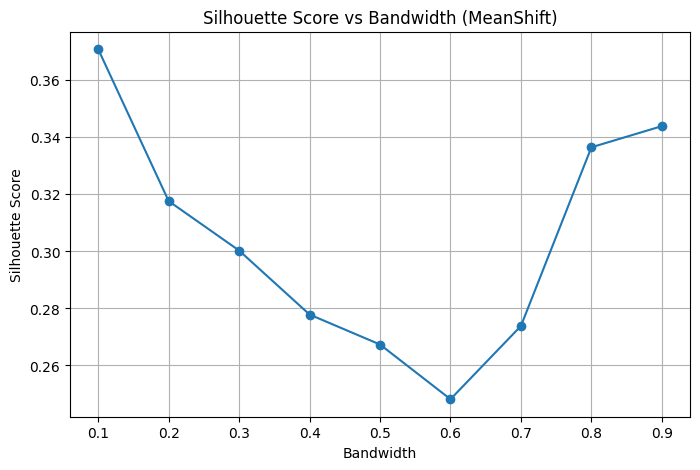

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(bandwidths, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Bandwidth (MeanShift)")
plt.xlabel("Bandwidth")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [27]:
best_idx = np.argmax(silhouette_scores)
best_bandwidth = bandwidths[best_idx]
best_score = silhouette_scores[best_idx]

print(f"✅ Best Bandwidth: {best_bandwidth:.2f}")
print(f"✅ Best Silhouette Score: {best_score:.4f}")


✅ Best Bandwidth: 0.10
✅ Best Silhouette Score: 0.3709


# Rerun the Mean Shift clustering with the best bandwidth
mean_shift_2 = MeanShift(bandwidth=best_bandwidth)
mean_shift_2.fit(X)
mean_shift_clusters_2 = mean_shift_2.predict(X)
mean_shift_clusters_centers_2 = mean_shift_2.cluster_centers_

# Get cluster labels
clusters_meanshift_2 = mean_shift_2.labels_

# Summary
print("Unique Clusters:", np.unique(clusters_meanshift_2))
print("Number of Unique Clusters:", len(np.unique(clusters_meanshift_2)))

I got 372 clusters

In [ ]:
#try randommizing the bandwidth parameter
mean_shift_2 = MeanShift(bandwidth=0.65)
mean_shift_2.fit(X)
mean_shift_clusters_2 = mean_shift_2.predict(X)
mean_shift_clusters_centers_2 = mean_shift_2.cluster_centers_

# Get cluster labels
clusters_meanshift_2 = mean_shift_2.labels_

# Summary
print("Unique Clusters:", np.unique(clusters_meanshift_2))
print("Number of Unique Clusters:", len(np.unique(clusters_meanshift_2)))

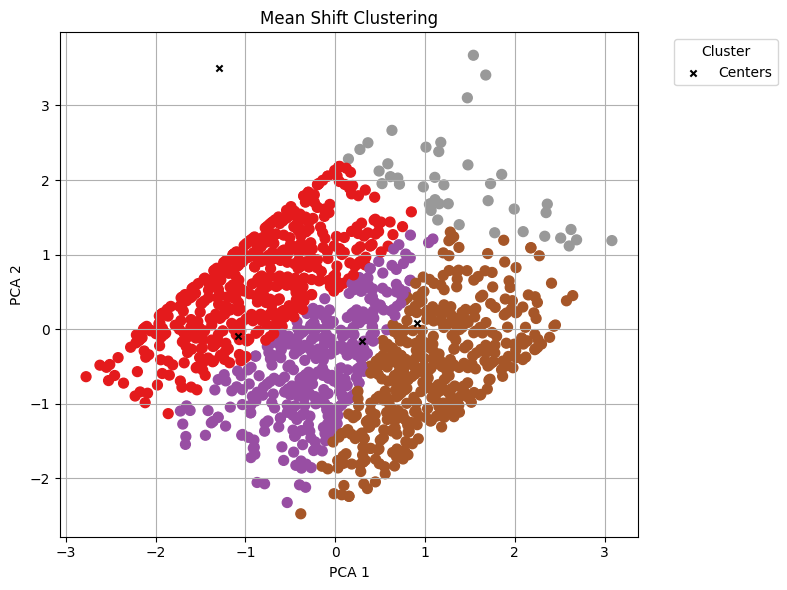

In [ ]:
#visualizing the clusters
plt.figure(figsize=(8, 6))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mean_shift_clusters_2, cmap='Set1', s=50)
plt.scatter(mean_shift_clusters_centers_2[:, 0], mean_shift_clusters_centers_2[:, 1], 
            c='black', marker='x', s=20, label='Centers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Mean Shift Clustering")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
filepath = "#add your path here"

In [ ]:
data = pd.read_csv(filepath)
data.head(5)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.307686,2.750622,1.937015
1,1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.243890,0.281190
2,1,1.579888,0.456187,0.942210,1.052926,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,0.527407,1.152255,0.201391
3,1,-0.768909,0.253732,3.283553,3.402909,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,3.394275,6.046041,4.935010
4,1,1.750297,-1.151816,0.280372,0.539340,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,0.220556,-0.868353,-0.397100


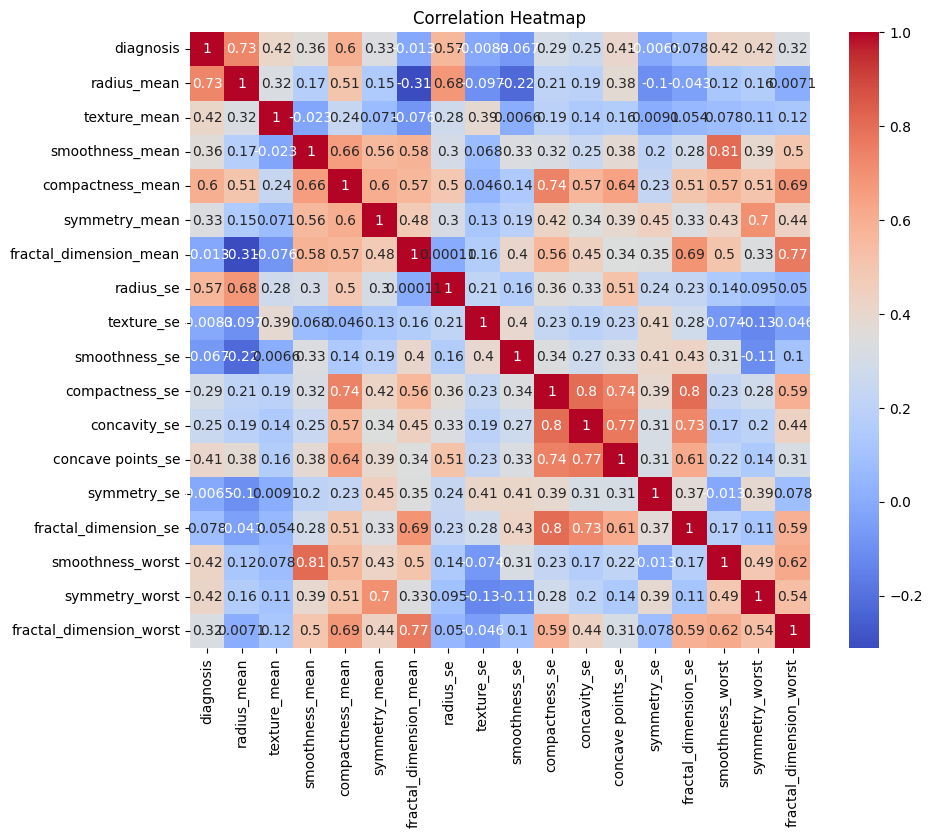

In [ ]:
correlation_matrix_2 = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
threshold  = 0.4
if threshold > correlation_matrix_2["diagnosis"].sort_values(ascending=False)[0]:
    print("The best features are:")
    print(correlation_matrix_2["diagnosis"].sort_values(ascending=False)[0])

In [ ]:
for feature, corr in correlation_matrix_2["diagnosis"].sort_values(ascending=False).items():
    if abs(corr) >= threshold:
        print(f"{feature} : {corr:.3f}")

diagnosis : 1.000
radius_mean : 0.730
compactness_mean : 0.597
radius_se : 0.567
smoothness_worst : 0.421
symmetry_worst : 0.416
texture_mean : 0.415
concave points_se : 0.408


In [ ]:
data_new = data[["radius_mean", "compactness_mean", "radius_se", "smoothness_worst", "symmetry_worst", "texture_mean", "concave points_se"]]
data_new.head(4)

,radius_mean,compactness_mean,radius_se,smoothness_worst,symmetry_worst,texture_mean,concave points_se
0,1.097064,3.283515,2.489734,1.307686,2.750622,-2.073335,0.660820
1,1.829821,-0.487072,0.499255,-0.375612,-0.243890,-0.353632,0.260162
2,1.579888,1.052926,1.228676,0.527407,1.152255,0.456187,1.424827
3,-0.768909,3.402909,0.326373,3.394275,6.046041,0.253732,1.115007


In [ ]:
data_new =pd.concat([data_new, data["diagnosis"]], axis=1)
data_new.head()

,radius_mean,compactness_mean,radius_se,smoothness_worst,symmetry_worst,texture_mean,concave points_se,diagnosis
0,1.097064,3.283515,2.489734,1.307686,2.750622,-2.073335,0.660820,1
1,1.829821,-0.487072,0.499255,-0.375612,-0.243890,-0.353632,0.260162,1
2,1.579888,1.052926,1.228676,0.527407,1.152255,0.456187,1.424827,1
3,-0.768909,3.402909,0.326373,3.394275,6.046041,0.253732,1.115007,1
4,1.750297,0.539340,1.270543,0.220556,-0.868353,-1.151816,1.144205,1


# KMeans


In [ ]:
X_new = data_new.drop("diagnosis", axis=1).values
y_new = data_new["diagnosis"].values

Text(0, 0.5, 'SSE')

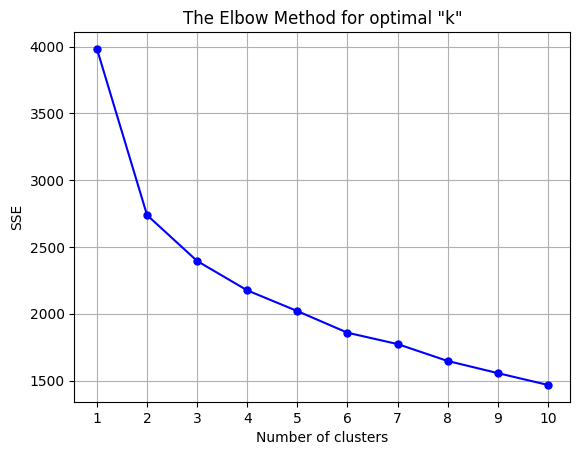

In [ ]:
from sklearn.cluster import KMeans
inertia_2 = []
for i in range(1, 11):
    model_2 = KMeans(n_clusters=i, random_state=0)
    model_2.fit(X_new)
    inertia_2.append(model_2.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia_2, marker='o', markersize=5, color='blue')
plt.xticks(range(1, 11))
plt.title('The Elbow Method for optimal "k"')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Model Inertia

In [ ]:
#from the elbow curve, we can see that the optimal number of clusters is 4
model_3 = KMeans(n_clusters=3, random_state=0)
y_new = model_3.fit_predict(X_new)
data_new['cluster'] = y_new

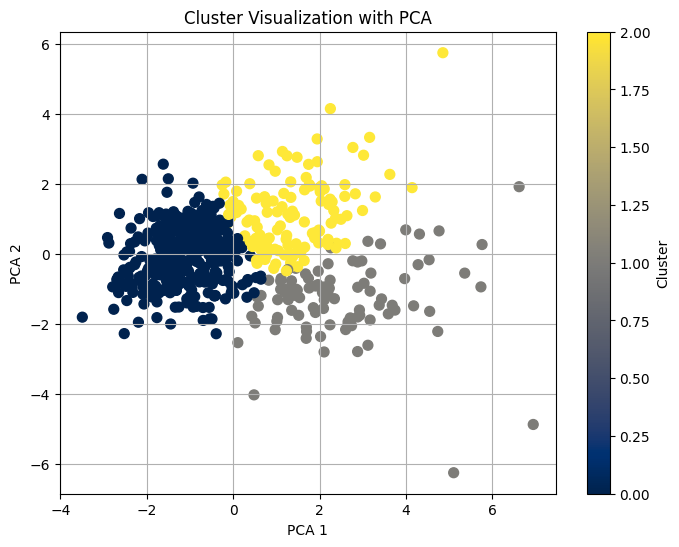

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_new = pca.fit_transform(X_new)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_new[:, 0], X_pca_new[:, 1], c=y_new, cmap='cividis', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Cluster Visualization with PCA')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [ ]:
print("\nCluster Summary (means):")
print(data_new.groupby('cluster').mean(numeric_only=True))
print("\nCluster Summary (count):")
print(data_new.groupby('cluster').size())


Cluster Summary (means):
         radius_mean  compactness_mean  radius_se  smoothness_worst  \
cluster                                                               
0          -0.482008         -0.568414  -0.431571         -0.398794   
1           1.580972          0.976386   1.636454          0.076474   
2           0.199190          0.893732   0.014442          1.078538   

         symmetry_worst  texture_mean  concave points_se  diagnosis  
cluster                                                              
0             -0.365196     -0.270135          -0.433511   0.076487  
1              0.036303      0.703084           1.136274   0.956522  
2              1.012695      0.247370           0.391065   0.782258  

Cluster Summary (count):
cluster
0    353
1     92
2    124
dtype: int64
